In [35]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
covid_df=pd.read_csv("covid_data.csv")

In [2]:
covid_df.head(10)

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5
5,Afghanistan,2020-01-05,0,0,38928341.0,2.581,1803.987,0.5
6,Afghanistan,2020-01-06,0,0,38928341.0,2.581,1803.987,0.5
7,Afghanistan,2020-01-07,0,0,38928341.0,2.581,1803.987,0.5
8,Afghanistan,2020-01-08,0,0,38928341.0,2.581,1803.987,0.5
9,Afghanistan,2020-01-09,0,0,38928341.0,2.581,1803.987,0.5


In [3]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    23082 non-null  object 
 1   date                        23082 non-null  object 
 2   new_cases                   23082 non-null  int64  
 3   new_deaths                  23082 non-null  int64  
 4   population                  23018 non-null  float64
 5   aged_65_older_percent       20643 non-null  float64
 6   gdp_per_capita              20711 non-null  float64
 7   hospital_beds_per_thousand  19144 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.4+ MB


In [4]:
covid_df.describe()

,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
count,23082.000000,23082.000000,2.301800e+04,20643.000000,20711.000000,19144.000000
mean,624.769257,35.629062,1.037003e+08,9.758570,22708.384791,3.204687
std,5517.309068,330.986941,6.716897e+08,6.445662,21187.826121,2.593700
min,-2461.000000,-1918.000000,8.090000e+02,1.144000,661.240000,0.100000
25%,0.000000,0.000000,2.083380e+06,3.853000,6426.674000,1.400000
50%,3.000000,0.000000,9.449321e+06,7.646000,15524.995000,2.600000
75%,55.000000,1.000000,3.346920e+07,15.322000,35220.084000,4.210000
max,133510.000000,10520.000000,7.794799e+09,27.049000,116935.600000,13.800000


## Determining the dimensions

In [5]:
covid_df.shape

(23082, 8)

<AxesSubplot:ylabel='Frequency'>

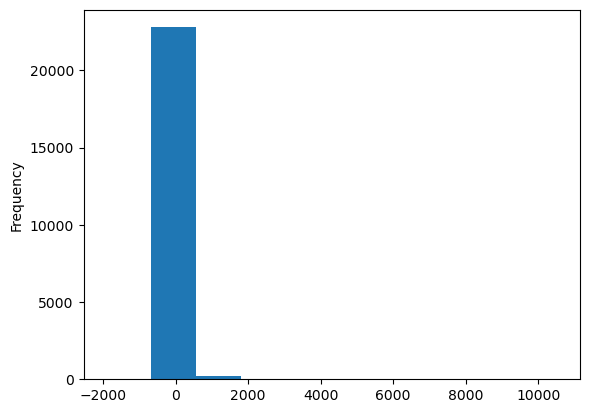

In [6]:
covid_df['new_deaths'].plot.hist()

## Finding and showing null values in a plot

In [7]:
covid_df.isnull().sum()

location                         0
date                             0
new_cases                        0
new_deaths                       0
population                      64
aged_65_older_percent         2439
gdp_per_capita                2371
hospital_beds_per_thousand    3938
dtype: int64

In [8]:
covid_df.location.nunique()

212

In [9]:
covid_df.columns

Index(['location', 'date', 'new_cases', 'new_deaths', 'population',
       'aged_65_older_percent', 'gdp_per_capita',
       'hospital_beds_per_thousand'],
      dtype='object')

<AxesSubplot:xlabel='location'>

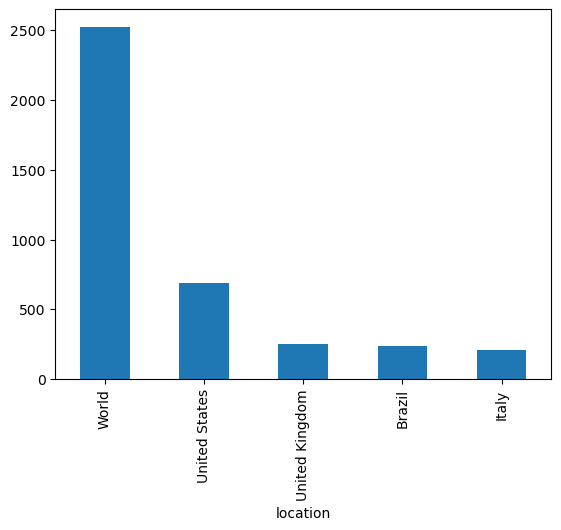

In [10]:
covid_df.groupby("location").new_deaths.mean().sort_values(ascending=False)[:5].plot.bar()

<AxesSubplot:xlabel='location'>

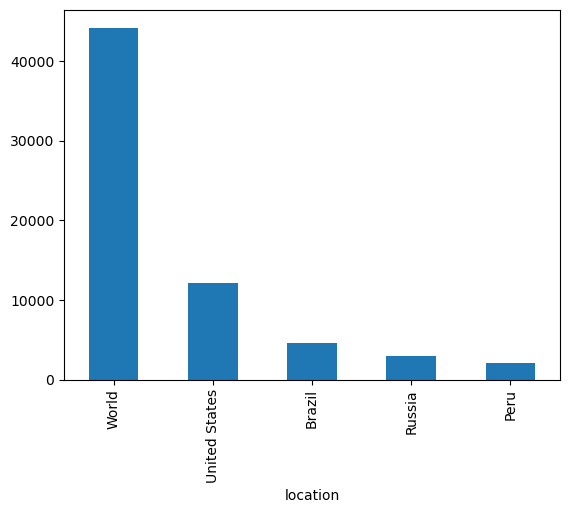

In [11]:
covid_df.groupby("location").new_cases.mean().sort_values(ascending=False)[:5].plot.bar()

<AxesSubplot:xlabel='location'>

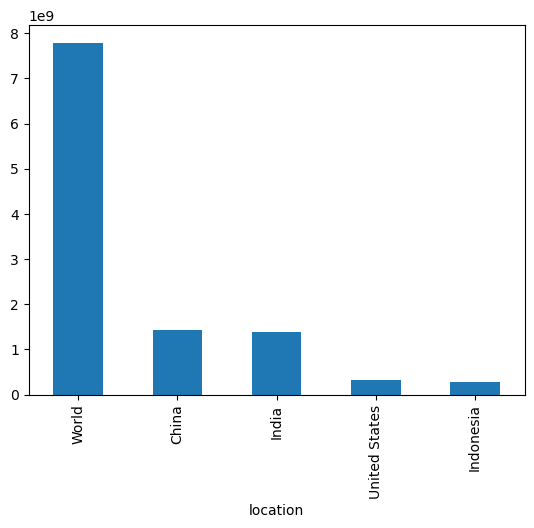

In [12]:
covid_df.groupby("location").population.mean().sort_values(ascending=False)[:5].plot.bar()

<AxesSubplot:xlabel='location'>

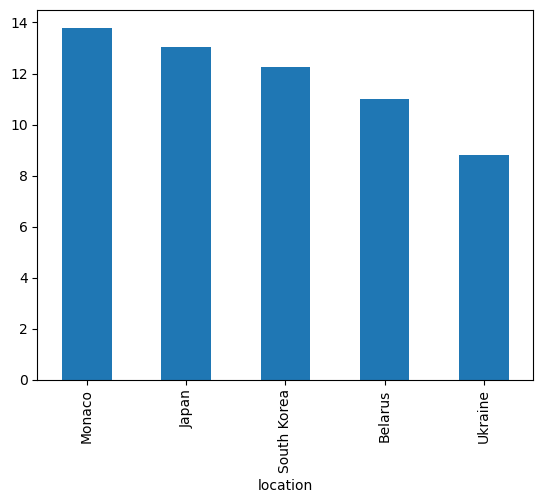

In [13]:
covid_df.groupby("location").hospital_beds_per_thousand.mean().sort_values(ascending=False)[:5].plot.bar()

<AxesSubplot:xlabel='location'>

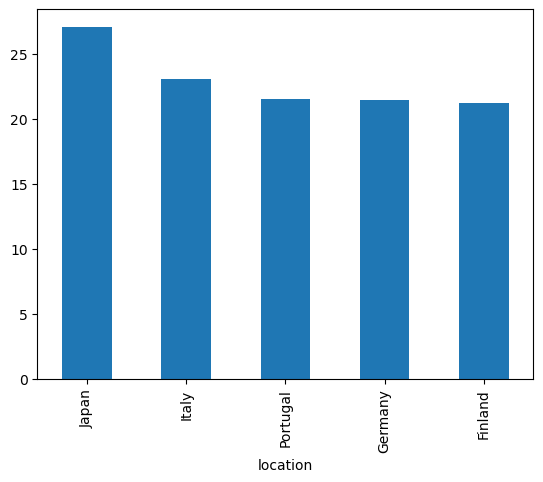

In [14]:
covid_df.groupby("location").aged_65_older_percent.mean().sort_values(ascending=False)[:5].plot.bar()

array([[<AxesSubplot:xlabel='new_cases', ylabel='new_cases'>,
        <AxesSubplot:xlabel='new_deaths', ylabel='new_cases'>],
       [<AxesSubplot:xlabel='new_cases', ylabel='new_deaths'>,
        <AxesSubplot:xlabel='new_deaths', ylabel='new_deaths'>]],
      dtype=object)

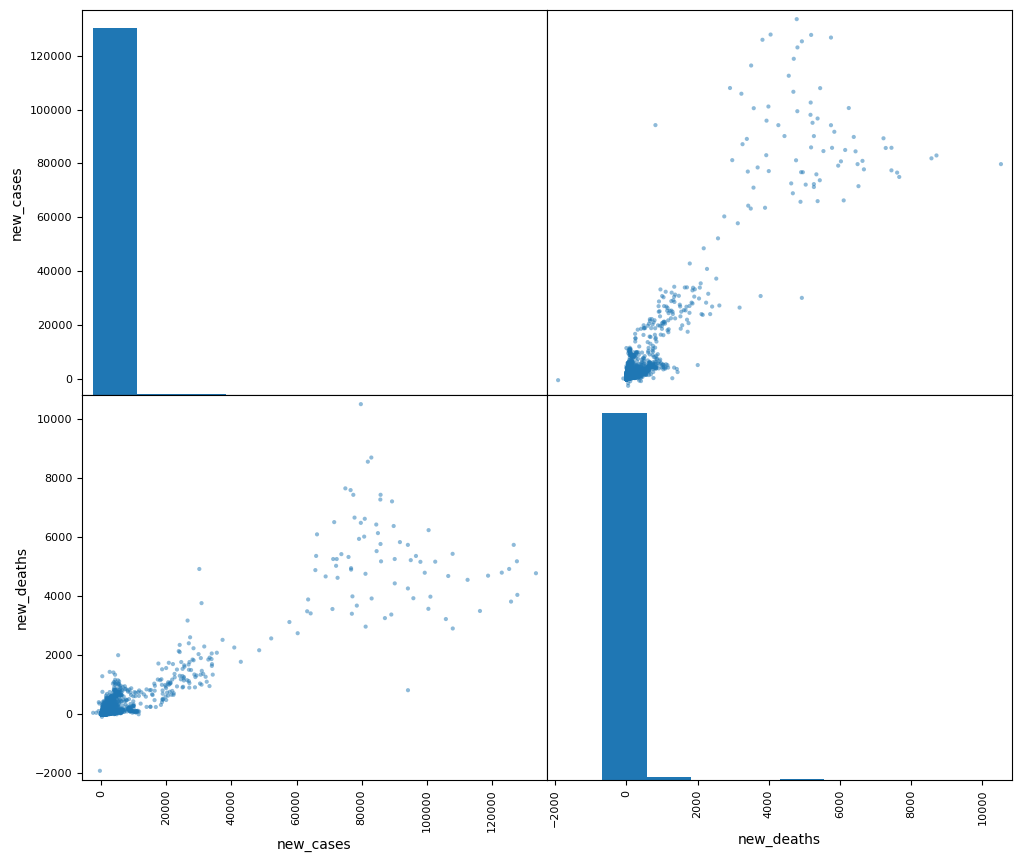

In [15]:
scatter_matrix(covid_df.loc[:,'new_cases':'new_deaths'],figsize=(12, 10))

<AxesSubplot:>

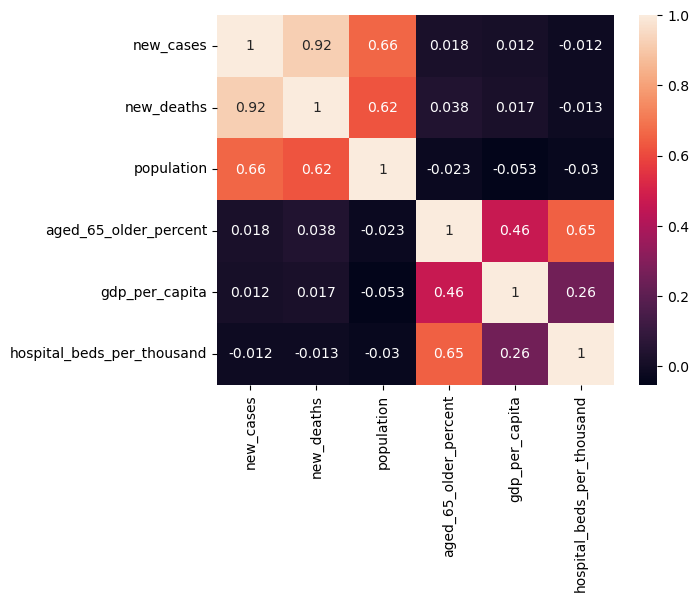

In [16]:
sns.heatmap(covid_df.corr(), annot=True)

<AxesSubplot:xlabel='location'>

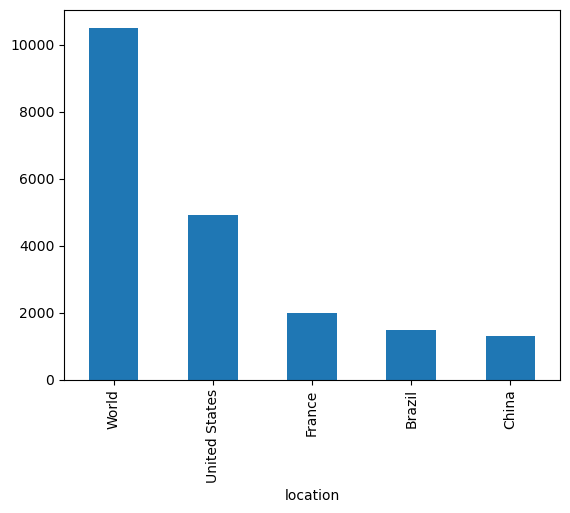

In [17]:
covid_df.groupby("location").new_deaths.max().sort_values(ascending=False)[:5].plot.bar()

In [18]:
covid_df.isnull().sum()

location                         0
date                             0
new_cases                        0
new_deaths                       0
population                      64
aged_65_older_percent         2439
gdp_per_capita                2371
hospital_beds_per_thousand    3938
dtype: int64

### Location wise details

In [19]:
##Location wise details
covid_df.groupby('location').sum().head(20)

,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
location,,,,,,
Afghanistan,21459,384,5.956036e+09,394.893,276010.011,76.50
Albania,1299,34,2.705132e+08,1239.672,1109522.514,271.66
Algeria,10382,724,6.928465e+09,981.338,2198386.562,300.20
Andorra,852,51,6.876585e+06,0.000,0.000,0.00
Angola,96,4,2.662168e+09,194.805,471379.095,0.00
Anguilla,3,0,1.140152e+06,0.000,0.000,0.00
Antigua and Barbuda,26,3,8.128024e+06,575.439,1783748.269,315.40
Argentina,24748,717,4.338795e+09,1075.008,1817655.072,480.00
Armenia,13675,217,4.563380e+08,1729.728,1353287.320,646.80


### Location wise confirmed cases in descending order

In [20]:
## Location wise confirmed cases in descending order
covid_df.groupby('location')['new_cases'].sum().sort_values(ascending=False).head(20)

location
World             7210462
United States     1979850
Brazil             739503
Russia             485253
United Kingdom     289140
India              276583
Spain              241966
Italy              235561
Peru               203736
Germany            184861
Iran               175927
Turkey             172114
France             154591
Chile              142759
Mexico             124301
Pakistan           113702
Saudi Arabia       108571
Canada              96642
China               84198
Qatar               71879
Name: new_cases, dtype: int64

### Finding the region with highest confirmed cases

In [21]:
## Finding the region with highest confirmed cases

covid_df.groupby('location').new_cases.sum().sort_values(ascending = False).head(2)

location
World            7210462
United States    1979850
Name: new_cases, dtype: int64

### Finding the Locations with lowest deaths

In [22]:
##Finding the regions with lowest deaths
covid_df.groupby('location').new_deaths.sum().sort_values(ascending = True).head(20)

location
Bonaire Sint Eustatius and Saba     0
Timor                               0
French Polynesia                    0
Namibia                             0
Fiji                                0
Cambodia                            0
Falkland Islands                    0
Bhutan                              0
Faeroe Islands                      0
Eritrea                             0
Papua New Guinea                    0
Dominica                            0
Saint Kitts and Nevis               0
Saint Lucia                         0
Seychelles                          0
New Caledonia                       0
Gibraltar                           0
Saint Vincent and the Grenadines    0
Vietnam                             0
Anguilla                            0
Name: new_deaths, dtype: int64

### Finding details for a particular country

In [23]:
##Finding details for a particular country
covid_df[covid_df.location == 'Pakistan']

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
15954,Pakistan,2019-12-31,0,0,220892331.0,4.495,5034.708,0.6
15955,Pakistan,2020-01-01,0,0,220892331.0,4.495,5034.708,0.6
15956,Pakistan,2020-01-02,0,0,220892331.0,4.495,5034.708,0.6
15957,Pakistan,2020-01-03,0,0,220892331.0,4.495,5034.708,0.6
15958,Pakistan,2020-01-04,0,0,220892331.0,4.495,5034.708,0.6
...,...,...,...,...,...,...,...,...
16107,Pakistan,2020-06-06,4734,97,220892331.0,4.495,5034.708,0.6
16108,Pakistan,2020-06-07,4960,67,220892331.0,4.495,5034.708,0.6
16109,Pakistan,2020-06-08,4728,65,220892331.0,4.495,5034.708,0.6
16110,Pakistan,2020-06-09,4646,105,220892331.0,4.495,5034.708,0.6


In [24]:
##Sorting the dataset by according to confirmed cases
covid_df.sort_values(by = ['new_cases'],ascending=True)

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
6237,Ecuador,2020-05-07,-2461,49,1.764306e+07,7.104,10581.936,1.500
6239,Ecuador,2020-05-09,-1480,50,1.764306e+07,7.104,10581.936,1.500
7488,France,2020-06-03,-766,107,6.527351e+07,19.718,38605.671,5.980
19498,Spain,2020-04-19,-713,410,4.675478e+07,19.436,34272.360,2.970
21805,United Kingdom,2020-05-21,-525,363,6.788600e+07,18.517,39753.244,2.540
...,...,...,...,...,...,...,...,...
23014,World,2020-06-07,125862,3822,7.794799e+09,8.696,15469.207,2.705
23011,World,2020-06-04,126684,5746,7.794799e+09,8.696,15469.207,2.705
23012,World,2020-06-05,127662,5189,7.794799e+09,8.696,15469.207,2.705
23007,World,2020-05-31,127796,4050,7.794799e+09,8.696,15469.207,2.705


In [25]:
covid_df['date'] = pd.to_datetime(covid_df.date)

In [26]:
germany_covid_df = covid_df[covid_df.location == "Germany"]
italy_covid_df = covid_df[covid_df.location == "Italy"]

In [27]:
germany_covid_df["cumsum"] = germany_covid_df.new_cases.cumsum()
italy_covid_df["cumsum"] = italy_covid_df.new_cases.cumsum()
gr_it = pd.merge(germany_covid_df, italy_covid_df, on='date')
gr_it

C:\Users\Muntaha\AppData\Local\Temp\ipykernel_13292\205320774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  germany_covid_df["cumsum"] = germany_covid_df.new_cases.cumsum()
C:\Users\Muntaha\AppData\Local\Temp\ipykernel_13292\205320774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_covid_df["cumsum"] = italy_covid_df.new_cases.cumsum()


,location_x,date,new_cases_x,new_deaths_x,population_x,aged_65_older_percent_x,gdp_per_capita_x,hospital_beds_per_thousand_x,cumsum_x,location_y,new_cases_y,new_deaths_y,population_y,aged_65_older_percent_y,gdp_per_capita_y,hospital_beds_per_thousand_y,cumsum_y
0,Germany,2019-12-31,0,0,83783945.0,21.453,45229.245,8.0,0,Italy,0,0,60461828.0,23.021,35220.084,3.18,0
1,Germany,2020-01-01,0,0,83783945.0,21.453,45229.245,8.0,0,Italy,0,0,60461828.0,23.021,35220.084,3.18,0
2,Germany,2020-01-02,0,0,83783945.0,21.453,45229.245,8.0,0,Italy,0,0,60461828.0,23.021,35220.084,3.18,0
3,Germany,2020-01-03,0,0,83783945.0,21.453,45229.245,8.0,0,Italy,0,0,60461828.0,23.021,35220.084,3.18,0
4,Germany,2020-01-04,0,0,83783945.0,21.453,45229.245,8.0,0,Italy,0,0,60461828.0,23.021,35220.084,3.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Germany,2020-06-06,407,33,83783945.0,21.453,45229.245,8.0,183678,Italy,518,85,60461828.0,23.021,35220.084,3.18,234531
159,Germany,2020-06-07,301,22,83783945.0,21.453,45229.245,8.0,183979,Italy,270,72,60461828.0,23.021,35220.084,3.18,234801
160,Germany,2020-06-08,214,6,83783945.0,21.453,45229.245,8.0,184193,Italy,197,53,60461828.0,23.021,35220.084,3.18,234998
161,Germany,2020-06-09,350,37,83783945.0,21.453,45229.245,8.0,184543,Italy,280,65,60461828.0,23.021,35220.084,3.18,235278


In [28]:
gr_it[abs(gr_it.cumsum_x - gr_it.cumsum_y) > 10000]['date'].min()

Timestamp('2020-03-12 00:00:00')

### What is the probability that a country has GDP over $10000, if we known that they have at least 5 hospital beds per 1000 inhabitants.

In [29]:
gdp_beds_by_country_df = covid_df.groupby('location')['gdp_per_capita', 'hospital_beds_per_thousand'].agg('first').dropna()
gdp_beds_by_country_df

C:\Users\Muntaha\AppData\Local\Temp\ipykernel_13292\1523145638.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gdp_beds_by_country_df = covid_df.groupby('location')['gdp_per_capita', 'hospital_beds_per_thousand'].agg('first').dropna()


,gdp_per_capita,hospital_beds_per_thousand
location,,
Afghanistan,1803.987,0.500
Albania,11803.431,2.890
Algeria,13913.839,1.900
Antigua and Barbuda,21490.943,3.800
Argentina,18933.907,5.000
...,...,...
Vietnam,6171.884,2.600
World,15469.207,2.705
Yemen,1479.147,0.700


In [30]:
country_at_least_5_beds_per_thousand_hospitals = gdp_beds_by_country_df[gdp_beds_by_country_df.hospital_beds_per_thousand >= 5]
country_at_least_5_beds_gdp_over_10000 = country_at_least_5_beds_per_thousand_hospitals[country_at_least_5_beds_per_thousand_hospitals.gdp_per_capita > 10000]
# country_at_least_5_beds_per_thousand_hospitals
len(country_at_least_5_beds_gdp_over_10000)/len(country_at_least_5_beds_per_thousand_hospitals)

0.8846153846153846

### Q6.Which country has the 3rd highest death rate? Death rate: total number of death per million inhabitants.

In [31]:
country_death_rate_df = covid_df.groupby('location').agg({'new_deaths': 'sum', 'population': 'mean', 'aged_65_older_percent': 'first'})
country_death_rate_df['death_rate'] = country_death_rate_df['new_deaths'] / country_death_rate_df['population'] * 1000000
country_death_rate_df.sort_values(by='death_rate', ascending=False)

,new_deaths,population,aged_65_older_percent,death_rate
location,,,,
San Marino,42,33938.0,NaN,1237.550828
Belgium,9619,11589616.0,18.571,829.967102
Andorra,51,77265.0,NaN,660.066007
United Kingdom,40883,67886004.0,18.517,602.230174
Spain,27136,46754783.0,19.436,580.389818
...,...,...,...,...
French Polynesia,0,280904.0,7.775,0.000000
Fiji,0,896444.0,6.224,0.000000
Mongolia,0,3278292.0,4.031,0.000000


### Q7.Look at the cumulative number of confirmed cases in Italy between 2020-02-28 and 2020-03-20. Fit an exponential function (y = Ae^(Bx)) to this set to express cumulative cases as a function of days passed, by minimizing squared loss. What is the difference between the exponential curve and the total number of real cases on 2020-03-20?

<AxesSubplot:xlabel='date', ylabel='cumsum'>

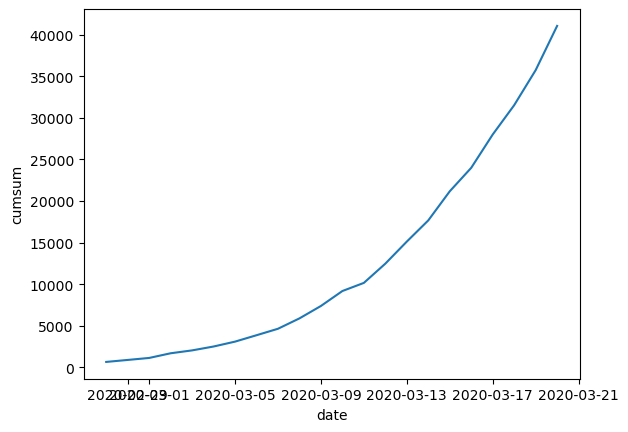

In [32]:
italy_cumsum_case_in_time_df = italy_covid_df[(italy_covid_df.date >= "2020-02-28") & (italy_covid_df.date <= "2020-03-20")]
sns.lineplot(data=italy_cumsum_case_in_time_df, x='date', y='cumsum')

In [33]:
italy_cumsum_case_in_time_df['ts'] = italy_cumsum_case_in_time_df.date.astype('int64') // 10**9
italy_cumsum_case_in_time_df['ts'] -= italy_cumsum_case_in_time_df['ts'].min()
x = italy_cumsum_case_in_time_df['ts']
y = italy_cumsum_case_in_time_df['cumsum']
p = np.polyfit(x, np.log(y), 1)
print(p)
# Convert the polynomial back into an exponential
a = np.exp(p[1])
b = p[0]
print(a, b)
y_fitted = a * np.exp(b * x)
# y_fitted

[2.24520424e-06 6.80040490e+00]
898.2109026485551 2.2452042412439063e-06


C:\Users\Muntaha\AppData\Local\Temp\ipykernel_13292\2959374382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_cumsum_case_in_time_df['ts'] = italy_cumsum_case_in_time_df.date.astype('int64') // 10**9
C:\Users\Muntaha\AppData\Local\Temp\ipykernel_13292\2959374382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_cumsum_case_in_time_df['ts'] -= italy_cumsum_case_in_time_df['ts'].min()


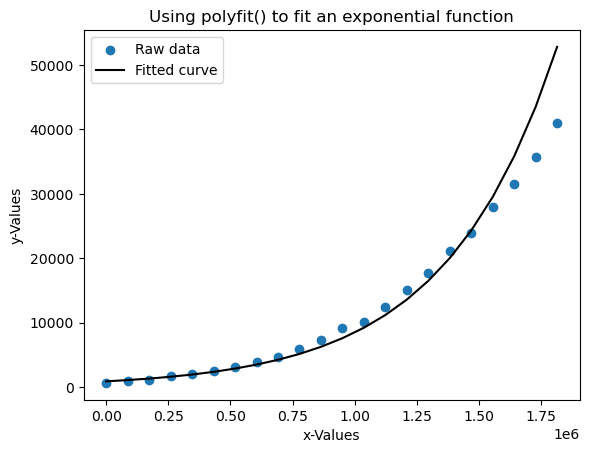

In [36]:
ax = plt.axes()
ax.scatter(x, y, label='Raw data')
ax.plot(x, y_fitted, 'k', label='Fitted curve')
ax.set_title('Using polyfit() to fit an exponential function')
ax.set_ylabel('y-Values')
ax.set_xlabel('x-Values')
ax.legend()

In [37]:
italy_data_2020_03_20 = italy_cumsum_case_in_time_df[italy_cumsum_case_in_time_df['date'] == '2020-03-20']
italy_data_2020_03_20

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,cumsum,ts
10768,Italy,2020-03-20,5322,429,60461828.0,23.021,35220.084,3.18,41035,1814400


In [38]:
x_test = italy_data_2020_03_20['ts'].item()
y_test = italy_data_2020_03_20['cumsum'].item()
y_pred = a * np.exp(b * x_test)
print(x_test, y_test, y_pred)
print(y_pred - y_test)

1814400 41035 52791.39454048472
11756.394540484718


### Q9. What is the F1 score of the following statement: Countries, where more than 20% of the population is over 65 years old, have death rates over 50 per million inhabitants. Ignore countries, where any of the neccessary information is missing!

In [40]:
country_death_rate_dropna_df = country_death_rate_df.dropna()
country_death_rate_dropna_df

,new_deaths,population,aged_65_older_percent,death_rate
location,,,,
Afghanistan,384,3.892834e+07,2.581,9.864279
Albania,34,2.877800e+06,13.188,11.814581
Algeria,724,4.385104e+07,6.211,16.510440
Angola,4,3.286627e+07,2.405,0.121705
Antigua and Barbuda,3,9.792800e+04,6.933,30.634752
...,...,...,...,...
Vietnam,0,9.733858e+07,7.150,0.000000
World,411195,7.794799e+09,8.696,52.752485
Yemen,127,2.982597e+07,2.922,4.258034


In [41]:
country_aged_65_over_20_percent = country_death_rate_dropna_df[country_death_rate_dropna_df.aged_65_older_percent > 20]
country_aged_65_over_20_percent

,new_deaths,population,aged_65_older_percent,death_rate
location,,,,
Bulgaria,167,6948445.0,20.801,24.034154
Finland,324,5540718.0,21.228,58.476176
Germany,8729,83783945.0,21.453,104.184638
Greece,183,10423056.0,20.396,17.557231
Italy,34043,60461828.0,23.021,563.049467
Japan,919,126476458.0,27.049,7.266174
Portugal,1492,10196707.0,21.502,146.321749


In [42]:
country_aged_65_over_20_percent_death_rate_over_50_per_million = country_aged_65_over_20_percent[country_aged_65_over_20_percent.death_rate > 50]
country_aged_65_over_20_percent_death_rate_over_50_per_million

,new_deaths,population,aged_65_older_percent,death_rate
location,,,,
Finland,324,5540718.0,21.228,58.476176
Germany,8729,83783945.0,21.453,104.184638
Italy,34043,60461828.0,23.021,563.049467
Portugal,1492,10196707.0,21.502,146.321749


In [43]:
from sklearn.metrics import f1_score
y_pred = [1] * len(country_aged_65_over_20_percent)
y_true = [1] * len(country_aged_65_over_20_percent_death_rate_over_50_per_million) + [0] * (len(country_aged_65_over_20_percent) - len(country_aged_65_over_20_percent_death_rate_over_50_per_million))
f1_score(y_true, y_pred)

0.7272727272727273